# Personal introduction 

I'm Binxu Wang, my status is a bit odd, grad student moving / transitioning to Harvard Neurobiology program, But I'm as passionate as computational neuroscience as you do. 

* I grew up in Beijing, China. 
* I was trained in **thoeretical physics** in Peking Univ., 
* and worked with **computational neuroscientist** Louis Tao before. 

* I came to Neuroscience program in Washington University in St Louis in 2018, working with Dr. Carlos R. Ponce on visual neuroscience in primates. 
* He moved to Harvard Neurobiology department this fall, so I'm here with you guys!

We are working on closed loop experiments letting machine learning system and visual system work together. My interest is on analyzing visual representations in the brain and in neural networks. Happy to talk about my research and our lab with you all!

<img src="https://github.com/Animadversio/GAN-Geometry/blob/master/img/Poster_thumbnail.png?raw=true" width=600>

I love cat, reading, 3d art etc. out of lab!

In [ ]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/S_f2qV2_U00?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')


You can contact me 
* on Slack. 
* via email (current one, may be updated) binxu.wang@wustl.edu
* Or visit our lab in HMS! https://ponce.hms.harvard.edu/

--------------------

# Leftover from Linear Algebra Review

## Matrix vector multiplication 

$$y=Ax$$

$$y_i=\sum_j A_{ij}x_j$$

## Matrix Multiplication 

$$AB=C$$

$$\sum_j A_{ij}B_{jk}=C_{ik}$$

Notice the shape compatibility of matrix multiplication, if `MatMul(A,B)` is possible, iff

* 2nd dimension of $A$ == 1st dimension of $B$
* If `A.shape=(l,m)`, `B.shape==(m,n)` then `C.shape==(l,n)`. See figure. 


<img src=https://miro.medium.com/max/1200/0*PPrxrvaBQbLopO2t.png width="500">

`MatMul` in action

![](https://www.cairographics.org/cookbook/matrix_transform/matrix_multiplication.gif)

Visual intuition of matrix multiplication. 

## Extra: Einstein Summation Rule

> **How to write it alternatively?**

This is extra, but I studied *physics* so I have to talk about this. 

Let's first recall element-wise formula of matrix multiplication and vector multiplication. 

$$\sum_j A_{ij}x_j=y_i$$
$$\sum_j A_{ij}B_{jk}=C_{ik}$$

Note that you can **imply the summation symbol** without writing it explicitly! 

$$A_{ij}x_j=y_i$$
$$A_{ij}B_{jk}=C_{ik}$$

This is called Einstein summation rule, or Einstein notation. [Anecdotal story]()

This notation is really useful when 

* Matrix multiplication is extended to tensor multiplication. 
* Taking derivatives of MatMul and deriving equations
* Writing expressions efficiently and flexibly. 


<img src=https://miro.medium.com/max/666/1*nYbMi6U_wbK_gXbhLzoQsA.png width="500">

Many machine learning framework has this exact function, `torch`,`numpy`,`tensorflow` etc.. much easier to write formula. 

In [1]:
import numpy as np

A = np.array([[1,2,3],[2,3,4]])
B = np.array([[5,6,7],[9,3,4]])

In [3]:
A

array([[1, 2, 3],
       [2, 3, 4]])

In [4]:
B

array([[5, 6, 7],
       [9, 3, 4]])

In [2]:
A@B.T

array([[38, 27],
       [56, 43]])

In [5]:
A.T@B

array([[23, 12, 15],
       [37, 21, 26],
       [51, 30, 37]])

In [6]:
np.einsum("ij,ik->jk",A,B)

array([[23, 12, 15],
       [37, 21, 26],
       [51, 30, 37]])

In [7]:
np.einsum("ij,kj->ik",A,B)

array([[38, 27],
       [56, 43]])

## Extra: Computational Complexity

> **How many operations is needed in a Matrix Multiplication?**

```python
# Input: matrices A and B
def matmul(A,B):
    n, m = A.shape
    mm, p = B.shape
    assert m == mm
    for i in range(n):
        for j range(p):
        S = 0
        for k from range(m):
            S += A[i,k] * B[k,j]
        C[i,j] = S
    return C
```

Naively it's on the order of `O(mnp)`

Some pointers

* [Wiki](https://en.wikipedia.org/wiki/Matrix_multiplication_algorithm) 

### Additional Note: MatMul and GPU

`MatMul` is the basic operation of most deep learning system. Ability to compute it fast is a great gain! 

Note that the element wise computation is *parallelizable*, and GPU is really good at this.
$$A_{ij}B_{jk}=C_{ik}$$

Python library like `torch`, `tensorflow`, `cupy` etc. can all use MatMul on GPU (implemented in `CUDA`) which makes it much much faster. 

---------------------------------

# Python Basic

**Creator**: Binxu Wang
* Some material borrowed from Timothy Holy

> How many of you have coded before?

Just like other programming languages, `Python` have variables and the commands / statements operates on them. 


We will first introduce the basic data types, the container data types, and then the numeric data types in `numpy`. 

Then we introduce the [control flow](https://docs.python.org/3/tutorial/controlflow.html) tools: `if` `for` `while`. 


Note **function** is another highly useful tool for flow control, but not covered extensively in this tutorial.

## Meta Knowledge

> `python` cannot be learnt in a section, so does any package in it. Some meta-knowledge will make it faster!

### Read document and help of function

In [9]:
help(len)

Help on built-in function len in module builtins:

len(obj, /)
    Return the number of items in a container.



In [10]:
help(sorted) # built-in function! 

Help on built-in function sorted in module builtins:

sorted(iterable, /, *, key=None, reverse=False)
    Return a new list containing all items from the iterable in ascending order.
    
    A custom key function can be supplied to customize the sort order, and the
    reverse flag can be set to request the result in descending order.



In [11]:
# ipython short cut
?range 

In [13]:
range(4)

range

In [14]:
np.arange?

### Inquire the type (and shape) of variable 

In [ ]:
type("your question")

`shift+Tab` to invoke inline inspection

More on shapes down below...

### `print` out results to see

In [ ]:
a = 1
b = 1
print(a+b,"=",a,"+",b) # you need bracket ! 

In [ ]:
print("%d=%d+%d"%(a+b,a,b))

## data type

Variables have `type` and different `type` of variables are equipped with different methods they can use! Same operator may have different effect when operating on different types

Here are some basic data types in `Python`. 

* int
* float
* str
* bool

In [15]:
type(1)

int

In [16]:
type(1.0)

float

In [17]:
type("compneuro")

str

In [18]:
type(True)

bool

In [ ]:
type(float)

In [19]:
# compare the different result 
1 + 1, 1.0 + 1.0, "1" + "1" 

(2, 2.0, '11')

Python is a **dynamically typed language**. You don't need to declare type **explicitly** when creating variable.

In [ ]:
a = 1
type(a)

In [ ]:
b = 1.0
type(b)

In [ ]:
b, type(a+b)

**Type conversion** is an important operation in basic and high level python. Name of the type can usually work as type converter. 

Many times, **type conversion** will run under the hood to convert the type to the correct required ones. Some type conversion rules are critical. (those to `bool`)

In [21]:
float(1)

1.0

In [22]:
bool(2)

True

In [23]:
bool("s")

True

In [24]:
bool("")

False

In [ ]:
str(1)

In [25]:
str(float(1))

'1.0'

In [26]:
float(bool(2))

1.0

### Basic Containers 

Basic data types can be put into **containers**. The basic containers are `list` `tuple` `dict`. Unlike array in C++ or Matlab, these containers can contain anything

### `list`

* `list` is created by the `[ ]` symbol. It contains any variables. (or containers)


In [27]:
a = 1.0
b = 1
list_a = [a, b, "1.0", [1,2]]
list_a

[1.0, 1, '1.0', [1, 2]]

`len` can be applied to lists to see how many elements are there.

In [ ]:
?len

In [28]:
len(list_a)

4

* Conceptually, list is a mapping from **natural numbers** to anything. 
* `[ ]` is the symbol for indexing -- get the object by the index, i.e. mapping integers to object. 
* Note the index starts from 0 and end in `L-1`

In [ ]:
a = 1.0
b = 1
list_a = [a, b, "1.0", [1,2]]

#### list indexing

In [ ]:
list_a[0]

In [ ]:
list_a[2]

In [ ]:
list_a[-1]

In [ ]:
list_a[-2]

Note range indexing `a:b` will have `b-a` objects, `list[b]` is excluded.

In [ ]:
list_a[1:4]

In [ ]:
list_a[:4:2] # adding step size

In [ ]:
list_a[3][1] # Recursive indexing 

#### Basic operations `+` `*` `in` 

Adding list will concatenate them:

In [ ]:
["a",2,3]+[3]

multply list will replicate it, 

In [ ]:
tmp = ["a"]*10
tmp

`in` test inclusion of an element 

In [ ]:
tmp = [1,5,2,3,7]
7 in tmp

`in` does not test for inclusion of subsequence, only element

In [ ]:
[7] in tmp

#### Methods of a container

In [ ]:
a = 1.0
b = 1
list_a = [a, b, "1.0", [1,2]]
list_a

In [ ]:
list_a.append?

In [ ]:
list_a.append(True) # append one object 
list_a

In [ ]:
list_a.extend([15, False]) # extend a sequence of object 

In [ ]:
list_a

Argument to `extend` must be `iterable` e.g. list or tuple!

In [ ]:
list_a.extend(1)

**Question**: the difference of outcome?

In [ ]:
A = [1]
B = [1]
A.append([1,2])
B.extend([1,2])

In [ ]:
print(A)
print(B)

Find the index of an element by `index`, it will throw an error when not included. (inverse mapping)

In [ ]:
tmp.index(7)

In [ ]:
tmp.index(8)

More material on these methods

* Official documentation https://docs.python.org/3/tutorial/datastructures.html
* W3 playground https://www.w3schools.com/python/python_ref_list.asp



#### Caveat: Changing elements

> **Does container store value of a variable or the variable itself?**

* If elements of a list is a **composite** variable (container or class), then the value of this element can change with the variable. 
* If it's a basic variable then the element's value will not change

In [29]:
x = "a"
y = True
list_b = [x,y,1.0]
list_b

['a', True, 1.0]

In [30]:
x += "b"
list_b

['a', True, 1.0]

In [32]:
x = [1,2]
y = True
list_b = [x,y,1.0]
list_b

[[1, 2], True, 1.0]

In [33]:
x[0] = 3
y = not y
list_b

[[3, 2], True, 1.0]

One very curious case.....

In [34]:
tmp = [[]]*10

In [35]:
tmp

[[], [], [], [], [], [], [], [], [], []]

In [36]:
tmp[0].append(1)
tmp

[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]

In [37]:
x = []
tmp = [x]*10
x.append(0)
tmp

[[0], [0], [0], [0], [0], [0], [0], [0], [0], [0]]

### `tuple`

`tuple` is created by comma `,`, when showed, it's shown with `( ,)` bracket 

In [38]:
x = 1, 
type(x)

tuple

In [39]:
x

(1,)

list and others can be converted to `tuple` 

In [40]:
tuple([1,2,3,"a"])

(1, 2, 3, 'a')

Same for `len`, Indexing, `+`, `*` 

In [41]:
tups = 1,2,True,[1,2]

In [42]:
tups[3].append(1)

In [43]:
tups[2] = False

TypeError: 'tuple' object does not support item assignment

In [44]:
len(tups)

4

In [45]:
tups = 1,2,3,4
tups + tups

(1, 2, 3, 4, 1, 2, 3, 4)

In [46]:
tups * 3

(1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4)

You cannot `append` or `delete` elements from a tuple without re-creating one.  

In [47]:
tups = 1,2,True,[1,2]

In [48]:
tups.append(1)

AttributeError: 'tuple' object has no attribute 'append'

In [49]:
tups.extend([1,2])

AttributeError: 'tuple' object has no attribute 'extend'

## Loops `for` `while`

Loops are used to iterate and apply operations repeatively to an object or to a sequence of objects.  

Majorly two types of loops `for` and `while`, 

### `for` and `iterator`

To use `for` loop, you need an iterable thing, `iterator` or container:

* Output of `range` (an `iterator` that goes through intergers)
* list
* tuple
* dict, dict.items(), dict.keys()
* np.array
* ...

Let's do a simple summation or product of a sequence in an loop.

In [50]:
S = 0
for i in range(100): # remember range starts from 0! 100 is not included
    S += i
print(S)

4950


Note the **indentation** and `:` two key syntax point in `python`

An equivalent `while` loop is like this, you can understand all `for` loop in this fashion

In [ ]:
S = 0

i = 0 # start `i` from the first element in iterator
while True:
    S += i
    
    i += 1 # move `i` to the next element in iterator
    if i == 100: # if `i` reaches end of iterator then leave.
        break
print(S)

In [52]:
S = 1
for i in range(1,100+1): # remember range starts from 0! range(1,101)
    S *= i
print(S)

93326215443944152681699238856266700490715968264381621468592963895217599993229915608941463976156518286253697920827223758251185210916864000000000000000000000000


In [54]:
enumerate(range(5))

You can also iterate a list and process them. 

In [55]:
data = [1,3,5,7]
output = []
for d in data:
    sq=d**2
    output.append(sq)
output

[1, 9, 25, 49]

Using `enumerate` to get the element + the index of element in case you need both. output of `enumerate` is also an iterator

In [56]:
data = [1,3,5,7]
output = [0]*len(data)
for i, d in enumerate(data):
    output[i] = d**2
output

[1, 9, 25, 49]

### when to use `while` 

Sometimes you don't know how many iterations you need before hand!

**Question**: Get the number of maximal $n$ such that adding 1 to $n$ is smaller than 100

In [ ]:
S=0
for i in range(1000): # this 1000 is just a guess 
    S += i
    if S > 100:
        break
print(i-1)

In [ ]:
S=0
i=0
while True: # Don't need to guess an upper limit here 
    S += i
    if S > 100:
        break
    i += 1
print(i-1)

### `break`, `continue`

`break` and `continue` are flow controller together with `for` and `while`
* Break get out of the **inner-most** loop
* Continue gets into the next loop in the **inner-most** loop

**Question**: Sum of all odd numbers < 100

In [ ]:
S=0
for i in range(100): # this 1000 is just a guess 
    if i % 2 == 0: # mod(2)==0 even
        continue
    S += i
print(S)

## Conditions `if`

`if` takes a bool (True False) or an expression, function outputting bool to decide which branches to go to. 

* *Note*: when the thing is not `bool` it will be type converted to `bool` as mentioned above. 
* Note indentation and `:`

```python
if condition1:
   # do sth 
elif condition2:
   pass
else:
   # others
```

## Synthesis: List comprehensions

List comprehension is a one-liner way to apply operations on a list of object. Usually used to write things efficiently.

In [57]:
monthnum = list(range(1,12))

In [58]:
monthnum

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [59]:
IsHot = [5 < n < 9 for n in monthnum]
IsHot

[False, False, False, False, False, True, True, True, False, False, False]

List comprehension can be used together with conditionals, to apply only to part of elements. 

In [60]:
HotMonth = [n for n in monthnum if 5 < n < 9]
HotMonth

[6, 7, 8]

## Define Your Functions `def` 

Function is a way to organize some code into a **black-box with input and output.**

**Question**: Sum of all prime numbers < 100

We can solve this without writing any function

In [61]:
S = 0
for i in range(100): 
    # Here you want to do something to test if `i` is prime
    pass # forget something ?
    is_prime = True
    for k in range(2,i):
        if i % k ==0:
            is_prime = False
            break # which loop this breaks out of?
    # Then do things based on the result
    if is_prime: #
        S += i
#         print(i)
print(S)

1061


But as you recognize there is **two layer of code** with some input output structure, you can wrap up some code into a function. 
`isPrime: int->bool` 

In [62]:
def isPrime(n):
    if n < 2: # note this edge case! 
        return False
    for i in range(2,n):
        if n % i == 0:
            return False
    return True

S=0
for i in range(100): 
    if isPrime(i): 
        S += i
#         print(i)
print(S)

1060


In [63]:
print(n) # Why this is not defined? 

NameError: name 'n' is not defined

### Scope, namespace

With functions you can think of it as a whole, **save you from details within the function**. 

* Variables defined in the functions are not visible to outside **namespace**
* Keep track of scope of variable is super important

See this [tutorial example](https://www.w3schools.com/python/python_scope.asp)

Functions can be nested to perform complicated things!

In [ ]:
sum(filter(isPrime,range(100),)) # filter out primes in a range and then sum

In [68]:
# get the number of primes 
def prime_count(n):
    # alternatively it can be
    # sum(map(isPrime,range(10000)))
    return sum(isPrime(i) for i in range(n))

In [65]:
# prime_counting curve
pr_cnt_curve = np.cumsum(list(map(isPrime,range(10000))))

In [67]:
prime_count(10000)

1229

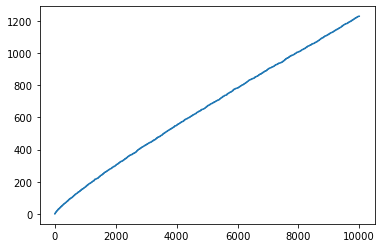

In [70]:
plt.plot(pr_cnt_curve)

## Numpy

In [69]:
import numpy as np
import matplotlib.pyplot as plt

Really widely used numerical package in `python`. Fundamental library for data sci and scientific computing in python. Basic functionality: 

* Linear algebra. Matrix, vector multiplication
* Vectorized operation. (broadcasting, indexing)
* Random generators
* ....

### Creating Arrarys 

Most basic fundamental data type in `numpy` is `np.array`. This is used to create arrays from 

* list
* list of lists / tuples
* ranges
* etc.

In [71]:
A = np.array([1,2,3])
A

array([1, 2, 3])

In [72]:
type(A)

numpy.ndarray

In [73]:
print(A.shape)
print(A.ndim)
print(A.dtype)

(3,)
1
int32


In [74]:
B = np.array([[1.0,2,3],[4,5,6]]) # notice the different datatype
B

array([[1., 2., 3.],
       [4., 5., 6.]])

In [75]:
print(B.shape)
print(B.ndim)
print(B.dtype)

(2, 3)
2
float64


In [76]:
C = np.array(range(10))
C

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

`array` and `range` are combined into `np.arange`

In [77]:
C = np.arange(10)
C

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Shape Manipulation

In [78]:
B.shape

(2, 3)

In [80]:
B = np.array([[1.0,2,3],[4,5,6]])
print(B) 

C = B.reshape(3,2)
print(C)

C = B.reshape(3,-1) # inferring shape from the rest
print(C)

C = B.reshape(6,1) # adding singleton dimension
print(C)

C = B.reshape(1,6)
print(C)

[[1. 2. 3.]
 [4. 5. 6.]]
[[1. 2.]
 [3. 4.]
 [5. 6.]]
[[1. 2.]
 [3. 4.]
 [5. 6.]]
[[1.]
 [2.]
 [3.]
 [4.]
 [5.]
 [6.]]
[[1. 2. 3. 4. 5. 6.]]


In [81]:
C = B.reshape(-1) # all in one, flatten 
print(C)

C = B.flatten() 
print(C)

C = B[:,np.newaxis,:] # adding new axis can use this
print(C, C.shape)

[1. 2. 3. 4. 5. 6.]
[1. 2. 3. 4. 5. 6.]
[[[1. 2. 3.]]

 [[4. 5. 6.]]] (2, 1, 3)


**Logic of value reshaping**: During reshaping, the order of the elements are in a fixed order sequence, always fill in the last dimension first.

Another important reshaping tools are `transpose`, and its simplified 2d version `.T` 

In [82]:
B = np.array([[1.0,2,3],[4,5,6]])
print(B.T)
print(B.transpose(0,1)) # nothing will change
print(B.transpose(1,0)) # same as transpose
print(B.reshape(3,2)) # Note the difference of transpose and reshape! 

[[1. 4.]
 [2. 5.]
 [3. 6.]]
[[1. 2. 3.]
 [4. 5. 6.]]
[[1. 4.]
 [2. 5.]
 [3. 6.]]
[[1. 2.]
 [3. 4.]
 [5. 6.]]


### Indexing 

See this document for extensive examples https://numpy.org/doc/stable/user/basics.indexing.html

In [83]:
C = np.array(range(15)).reshape([5,3])
C

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [84]:
C[1,1]

4

In [85]:
C[-2,-1]

11

You can also slice a row or column from array. 

**Note** these slices are all 1d array, row and col vectors are not different in shape in this manner. This is different from matlab.

In [86]:
C[1,:]

array([3, 4, 5])

In [87]:
C[:,1] # note these slices are all 1d array, row and col vectors are not different in shape in this manner

array([ 1,  4,  7, 10, 13])

But this case the slices are 2d arrays of different shapes!

In [88]:
C[:, 1:2]

array([[ 1],
       [ 4],
       [ 7],
       [10],
       [13]])

In [89]:
C[1:2,:]

array([[3, 4, 5]])

In [90]:
C[1] # understand this as if C is list of lists; different from matlab

array([3, 4, 5])

In [91]:
C[:] # everything, not flattened; different from matlab 

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

One advanced type of indexing is by boolean mask 

In [92]:
monthnum = np.arange(1,13)

In [93]:
isHot = (monthnum < 9) * (5 < monthnum)

In [94]:
isHot

array([False, False, False, False, False,  True,  True,  True, False,
       False, False, False])

In [95]:
monthnum[isHot] # extract only the element corresponding to True 

array([6, 7, 8])

Mask can be applied only to one axis!

In [96]:
monthnum2 = np.arange(1,37).reshape(3,12)

In [97]:
monthnum2

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]])

In [98]:
monthnum2[:,isHot]

array([[ 6,  7,  8],
       [18, 19, 20],
       [30, 31, 32]])

In [99]:
monthnum2[1,isHot]

array([18, 19, 20])

In [100]:
monthnum2[[True, False, False],isHot] # one mask on one dimension

array([6, 7, 8])

### Array operations: MatMul and Dot  

In [ ]:
np.matmul?

In [101]:
A = np.arange(15).reshape([5,3])
B = np.arange(12).reshape([3,4])
C = A @ B
C

array([[ 20,  23,  26,  29],
       [ 56,  68,  80,  92],
       [ 92, 113, 134, 155],
       [128, 158, 188, 218],
       [164, 203, 242, 281]])

In [102]:
C = np.matmul(A,B)
C

array([[ 20,  23,  26,  29],
       [ 56,  68,  80,  92],
       [ 92, 113, 134, 155],
       [128, 158, 188, 218],
       [164, 203, 242, 281]])

In [103]:
np.dot(A,B)  # not recommended, but it can work. Its behavior is quite flexible.

array([[ 20,  23,  26,  29],
       [ 56,  68,  80,  92],
       [ 92, 113, 134, 155],
       [128, 158, 188, 218],
       [164, 203, 242, 281]])

### Array operations: Broadcasting

Numpy can `broadcast` and virtually change shape of variable to make element wise operation happen. This mechanism can be used to do column/row-wise, element-wise operations. e.g. 
* Scale the channels of an 256,256,3 image separately.

![](https://numpy.org/devdocs/_images/broadcasting_1.svg)

`numpy` will automatically choose the dimension to broadcast: 
* Dimension have to match exactly. 
* or one of them is $1$

https://numpy.org/doc/stable/user/basics.broadcasting.html

In [104]:
A = np.arange(15).reshape(3,5)
A

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [105]:
b = np.arange(3)

In [109]:
b[:, np.newaxis].shape

(3, 1)

In [107]:
A * b

ValueError: operands could not be broadcast together with shapes (3,5) (3,) 

In [108]:
A * b[:, np.newaxis]

array([[ 0,  0,  0,  0,  0],
       [ 5,  6,  7,  8,  9],
       [20, 22, 24, 26, 28]])

**Example**: Rectify a sine wave

In this example all operations are broadcasted, `>` `<`, `*`, `-` `+` `np.sin`

In [ ]:
X = np.arange(0,2*np.pi,0.05)
Sine = np.sin(X)

In [ ]:
Sine > 0

In [ ]:
absSine = (Sine > 0) * Sine + (Sine < 0) * (- Sine )

**Example**: outer product of sine wave vector

In [ ]:
X = np.arange(0,2*np.pi,0.05)
Sine = np.sin(X)
Sine_outerprod = Sine[:,np.newaxis] * Sine[np.newaxis,:]

In [ ]:
plt.plot(X,Sine)
plt.show()
plt.imshow(Sine_outerprod)

##  Matplotlib

Widely used visualization package in `python`, synergize with `numpy` and native python.

> Objective: Learn to read matplotlib code.

### Basic plotting: `plot`, `scatter`, `hist`

These are bread and butter in `plt`, useful to make quick and dirty visualization of your data. These figures are usually not good enough to show others, but good enough to see some trend! 

**Note**: for better and prettier default plotting, check out `seaborn`, which is built on `plt`.

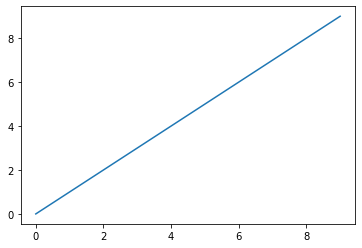

In [110]:
plt.plot(range(10))

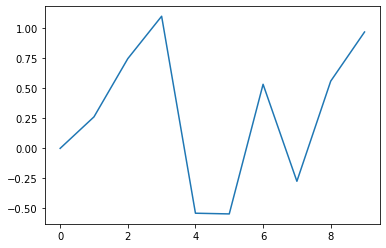

In [111]:
plt.plot(range(10),np.random.randn(10))

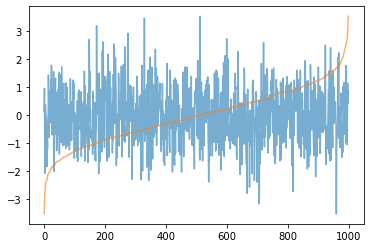

In [112]:
normal_random = np.random.randn(1000)
plt.plot(range(1000),normal_random,alpha=0.6)
# Note unlike matlab, the default behavior of plt is to add plot on top of each other
plt.plot(range(1000),sorted(normal_random),alpha=0.6) 

(-0.04722650856228535,
 4.5794103990048365,
 -2.318479540143302,
 2.3081573674238194)

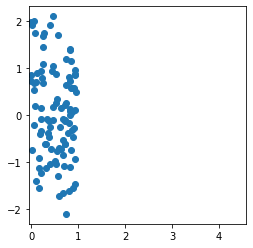

In [113]:
plt.scatter(np.random.rand(100),np.random.randn(100))
plt.axis("square") # set aspect ratio. similar to matlab

(array([ 92.,  96.,  93., 102.,  93., 119., 117.,  83., 106.,  99.]),
 array([6.60850566e-04, 1.00590179e-01, 2.00519508e-01, 3.00448837e-01,
        4.00378166e-01, 5.00307495e-01, 6.00236824e-01, 7.00166153e-01,
        8.00095481e-01, 9.00024810e-01, 9.99954139e-01]),
 <BarContainer object of 10 artists>)

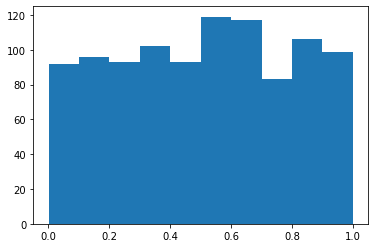

In [114]:
plt.hist(np.random.rand(1000))

(array([[  0.,   2.,  20., 121., 264., 318., 207.,  53.,   7.,   2.],
        [  1.,   2.,  22., 119., 292., 330., 192.,  62.,   6.,   0.],
        [  0.,   2.,  23., 119., 271., 311., 214.,  65.,   8.,   0.],
        [  1.,   3.,  33., 128., 275., 319., 202.,  62.,   9.,   1.],
        [  0.,   1.,  15., 123., 281., 321., 198.,  66.,   5.,   2.],
        [  1.,   1.,  12., 124., 264., 343., 197.,  67.,   9.,   4.],
        [  0.,   7.,  22., 105., 269., 326., 198.,  50.,  10.,   1.],
        [  1.,   1.,  30., 126., 250., 299., 197.,  50.,  12.,   1.],
        [  0.,   5.,  32.,  94., 284., 338., 187.,  47.,  11.,   2.],
        [  0.,   3.,  24., 110., 237., 317., 185.,  59.,  10.,   0.]]),
 array([2.59897980e-05, 1.00021160e-01, 2.00016329e-01, 3.00011499e-01,
        4.00006669e-01, 5.00001839e-01, 5.99997008e-01, 6.99992178e-01,
        7.99987348e-01, 8.99982518e-01, 9.99977688e-01]),
 array([-4.45919208, -3.60894177, -2.75869145, -1.90844114, -1.05819083,
        -0.20794051,  0

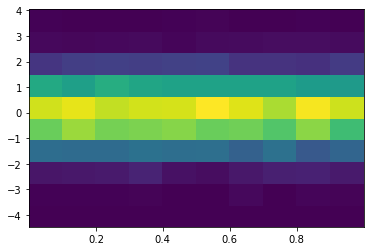

In [115]:
plt.hist2d(np.random.rand(10000),np.random.randn(10000))

### Dissection of a full plotting function 

To make a *real* plot or figure, we need more than simple plot function. You need 
* **Figure / Canvas**, how the plots are organized / layouted, in grid, or sth else. 
* **Axis**, where to put the plots. 
* **Annotations** of plots in each axis. 

To see an introduction to different level of figure objects types, https://matplotlib.org/stable/tutorials/introductory/usage.html

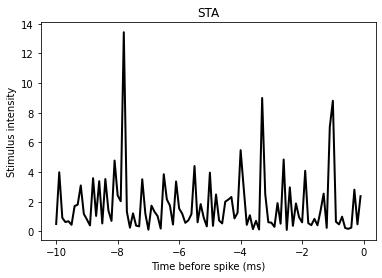

In [117]:
# adapted from Ella's Colab notebook
fig, ax = plt.subplots(1, 1) # create figure and axes in a 1 by 1 grid. 
# fig = plt.figure()
ax.plot(np.arange(-10,0,0.1), np.exp(np.random.randn(100)), # plot some pseudo data
        'k', lw = 2) # Additional arguments to styling the plot

ax.set(title = 'STA', 
      xlabel = 'Time before spike (ms)',
      ylabel = 'Stimulus intensity'); # annotations


Here is an unexhaustive list of parts you can control

<img src="https://matplotlib.org/stable/_images/anatomy.png" width=650>

### Learning from Examples in Gallery

`plt` is a complex package, developping your own ploting function can be time consuming. So starting from simple and someone's existing code is good idea!

* Some style useful to draw confusion matrix and some parameter sweep result!
https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html
* Power spectral representation
https://matplotlib.org/stable/gallery/lines_bars_and_markers/spectrum_demo.html
* Visualize vector field https://matplotlib.org/stable/gallery/images_contours_and_fields/plot_streamplot.html